In [2]:
%pip install yfinance pandas numpy matplotlib



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams["figure.figsize"] = (12, 6)

TICKER = "NVDA"
START = "2016-01-01"
END = None

df = yf.download(TICKER, start=START, end=END, auto_adjust=True, progress=False)

df = df[["Open", "High", "Low", "Close", "Volume"]].dropna()
df["ret"] = df["Close"].pct_change()

df.head(), df.tail(), df.shape


(Price           Open      High       Low     Close     Volume       ret
 Ticker          NVDA      NVDA      NVDA      NVDA       NVDA          
 Date                                                                   
 2016-01-04  0.787636  0.794710  0.781538  0.789588  358076000       NaN
 2016-01-05  0.804467  0.815688  0.792759  0.802272  490272000  0.016064
 2016-01-06  0.789100  0.792759  0.760073  0.769098  449344000 -0.041350
 2016-01-07  0.749828  0.754950  0.728850  0.738607  645304000 -0.039645
 2016-01-08  0.748120  0.748852  0.721289  0.722752  398472000 -0.021466,
 Price             Open        High         Low       Close     Volume  \
 Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
 Date                                                                    
 2026-01-30  191.210007  194.490005  189.470001  191.130005  179489500   
 2026-02-02  187.199997  190.300003  184.880005  185.610001  165794100   
 2026-02-03  186.240005  186.270004  176.2299

In [4]:
# Clean up yfinance column format (handles MultiIndex columns)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df.head(), df.shape


(Price           Open      High       Low     Close     Volume       ret
 Date                                                                   
 2016-01-04  0.787636  0.794710  0.781538  0.789588  358076000       NaN
 2016-01-05  0.804467  0.815688  0.792759  0.802272  490272000  0.016064
 2016-01-06  0.789100  0.792759  0.760073  0.769098  449344000 -0.041350
 2016-01-07  0.749828  0.754950  0.728850  0.738607  645304000 -0.039645
 2016-01-08  0.748120  0.748852  0.721289  0.722752  398472000 -0.021466,
 (2538, 6))

In [5]:
print("Start:", df.index.min())
print("End:", df.index.max())
print("Rows:", len(df))
df.tail()


Start: 2016-01-04 00:00:00
End: 2026-02-05 00:00:00
Rows: 2538


Price,Open,High,Low,Close,Volume,ret
Date,,,,,,
2026-01-30,191.210007,194.490005,189.470001,191.130005,179489500,-0.007168
2026-02-02,187.199997,190.300003,184.880005,185.610001,165794100,-0.028881
2026-02-03,186.240005,186.270004,176.229996,180.339996,204019600,-0.028393
2026-02-04,179.460007,179.580002,171.910004,174.190002,206469800,-0.034102
2026-02-05,174.925003,176.809998,171.309998,175.589996,108714180,0.008037


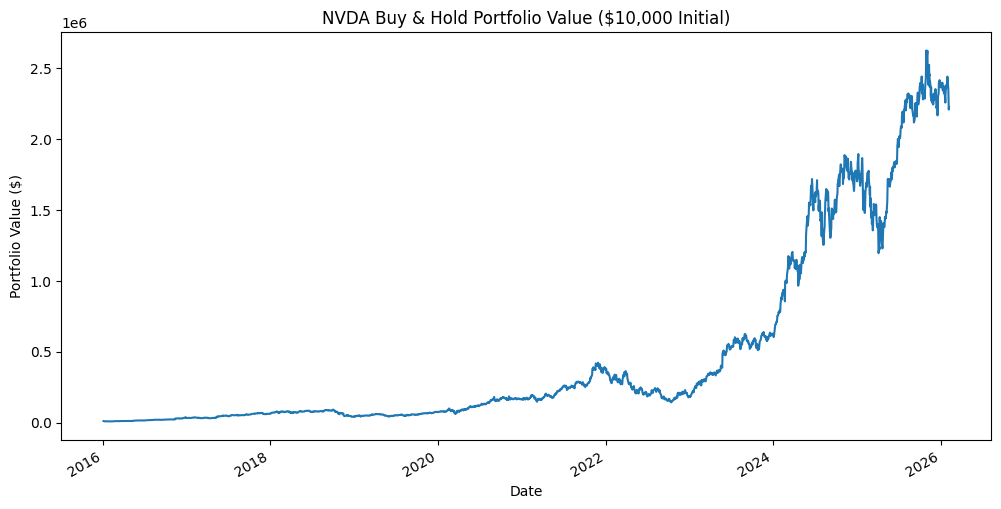

Price,bh_portfolio
Date,
2026-01-30,2.420631e+06
2026-02-02,2.350721e+06
2026-02-03,2.283977e+06
2026-02-04,2.206088e+06
2026-02-05,2.223819e+06


In [6]:
# Buy & Hold Strategy

initial_capital = 10000  # $10,000 starting capital

# Cumulative growth of $1 invested
df["bh_growth"] = (1 + df["ret"]).cumprod()

# Portfolio value over time
df["bh_portfolio"] = initial_capital * df["bh_growth"]

# Plot
df["bh_portfolio"].plot(
    title="NVDA Buy & Hold Portfolio Value ($10,000 Initial)",
    ylabel="Portfolio Value ($)"
)
plt.show()

# Show final value
df[["bh_portfolio"]].tail()


/var/folders/7b/3ln1dmns4rzfd39j83ksbq3c0000gn/T/ipykernel_91650/934351.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample("M").last()


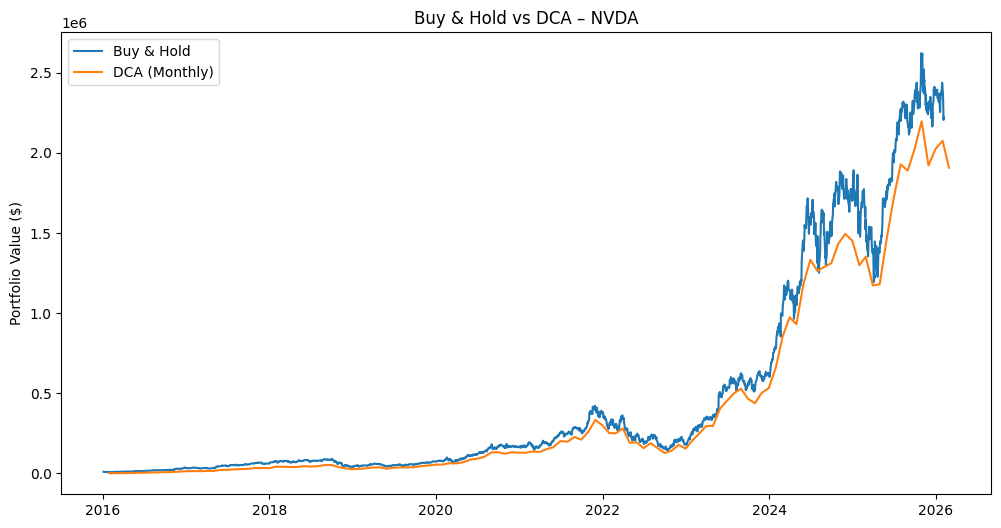

Price,dca_portfolio
Date,
2025-10-31,2.197595e+06
2025-11-30,1.921456e+06
2025-12-31,2.025198e+06
2026-01-31,2.075975e+06
2026-02-28,1.907686e+06


In [7]:
# Dollar Cost Averaging (Monthly)

monthly_investment = 500  # $500 per month

# Create monthly dates
monthly_df = df.resample("M").last()

# Shares bought each month
monthly_df["shares_bought"] = monthly_investment / monthly_df["Close"]

# Total shares over time
monthly_df["total_shares"] = monthly_df["shares_bought"].cumsum()

# Portfolio value
monthly_df["dca_portfolio"] = monthly_df["total_shares"] * monthly_df["Close"]

# Plot comparison
plt.figure(figsize=(12,6))
plt.plot(df.index, df["bh_portfolio"], label="Buy & Hold")
plt.plot(monthly_df.index, monthly_df["dca_portfolio"], label="DCA (Monthly)")
plt.legend()
plt.title("Buy & Hold vs DCA – NVDA")
plt.ylabel("Portfolio Value ($)")
plt.show()

monthly_df[["dca_portfolio"]].tail()


In [8]:
# Use month-end frequency (newer, avoids warning)
monthly_df = df.resample("ME").last().copy()
monthly_df = monthly_df.dropna(subset=["Close"])
monthly_df.head(), monthly_df.tail()


(Price           Open      High       Low     Close     Volume       ret  \
 Date                                                                      
 2016-01-31  0.690066  0.715922  0.687383  0.714459  310504000  0.044207   
 2016-02-29  0.773859  0.783896  0.767249  0.767738  323344000 -0.006494   
 2016-03-31  0.879373  0.881332  0.865419  0.872274  379884000 -0.003636   
 2016-04-30  0.882556  0.884515  0.860278  0.869826  321904000 -0.018508   
 2016-05-31  1.131526  1.149198  1.130789  1.146743  412524000  0.017865   
 
 Price       bh_growth  bh_portfolio  
 Date                                 
 2016-01-31   0.904850   9048.502225  
 2016-02-29   0.972328   9723.281722  
 2016-03-31   1.104721  11047.207147  
 2016-04-30   1.101620  11016.203341  
 2016-05-31   1.452332  14523.319587  ,
 Price             Open        High         Low       Close     Volume  \
 Date                                                                    
 2025-10-31  206.438500  207.958420  202.058

In [9]:
monthly_investment = 500

monthly_df["shares_bought"] = monthly_investment / monthly_df["Close"]
monthly_df["total_shares"] = monthly_df["shares_bought"].cumsum()
monthly_df["dca_portfolio"] = monthly_df["total_shares"] * monthly_df["Close"]

# How much cash you actually invested (contributed)
monthly_df["contribution"] = monthly_investment
monthly_df["total_contributed"] = monthly_df["contribution"].cumsum()

final_contributed = float(monthly_df["total_contributed"].iloc[-1])
final_value_dca = float(monthly_df["dca_portfolio"].iloc[-1])

print("Total contributed (DCA):", round(final_contributed, 2))
print("Final portfolio value (DCA):", round(final_value_dca, 2))
print("Multiple on contributed:", round(final_value_dca / final_contributed, 2))


Total contributed (DCA): 61000.0
Final portfolio value (DCA): 1907685.64
Multiple on contributed: 31.27


In [10]:
import numpy as np

def perf_stats(equity_curve: pd.Series, periods_per_year: int = 252, rf: float = 0.0):
    equity_curve = equity_curve.dropna()
    rets = equity_curve.pct_change().dropna()

    years = (equity_curve.index[-1] - equity_curve.index[0]).days / 365.25
    cagr = (equity_curve.iloc[-1] / equity_curve.iloc[0]) ** (1 / years) - 1

    vol = rets.std() * np.sqrt(periods_per_year)
    sharpe = (rets.mean() * periods_per_year - rf) / vol if vol != 0 else np.nan

    running_max = equity_curve.cummax()
    drawdown = equity_curve / running_max - 1
    max_dd = drawdown.min()

    return {
        "CAGR": cagr,
        "Volatility": vol,
        "Sharpe": sharpe,
        "MaxDrawdown": max_dd
    }

# Buy & Hold stats (daily)
bh_stats = perf_stats(df["bh_portfolio"], periods_per_year=252)

# DCA stats (monthly curve => 12 periods/year)
dca_stats = perf_stats(monthly_df["dca_portfolio"], periods_per_year=12)

bh_stats, dca_stats


({'CAGR': np.float64(0.7061486169762001),
  'Volatility': np.float64(0.49748985676185264),
  'Sharpe': np.float64(1.3239464942143082),
  'MaxDrawdown': np.float64(-0.6633509751543181)},
 {'CAGR': np.float64(1.2666302974460795),
  'Volatility': np.float64(0.6206185781522605),
  'Sharpe': np.float64(1.6224578365897835),
  'MaxDrawdown': np.float64(-0.6185572226346807)})

In [11]:
# COVID stress period: Feb 2020 – Apr 2020
covid = df.loc["2020-02-01":"2020-04-30"].copy()

covid["bh_dd"] = covid["bh_portfolio"] / covid["bh_portfolio"].cummax() - 1

covid_dd = covid["bh_dd"].min()

print("Buy & Hold max drawdown during COVID:", round(covid_dd * 100, 2), "%")


Buy & Hold max drawdown during COVID: -37.55 %


In [12]:
from scipy.stats import norm
import numpy as np

def black_scholes_call_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    put = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

    return call, put


# Example: NVDA option during COVID (March 2020 approx)
S = df.loc["2020-03-16"]["Close"]   # crash period price
K = S                              # ATM option
T = 0.5                            # 6 months
r = 0.01                           # 1% risk-free
sigma = df["ret"].std() * np.sqrt(252)  # annualised vol

call_price, put_price = black_scholes_call_put(S, K, T, r, sigma)

print("Spot price:", round(S,2))
print("Implied volatility:", round(sigma,2))
print("Call price:", round(call_price,2))
print("Put price:", round(put_price,2))


Spot price: 4.89
Implied volatility: 0.5
Call price: 0.69
Put price: 0.67


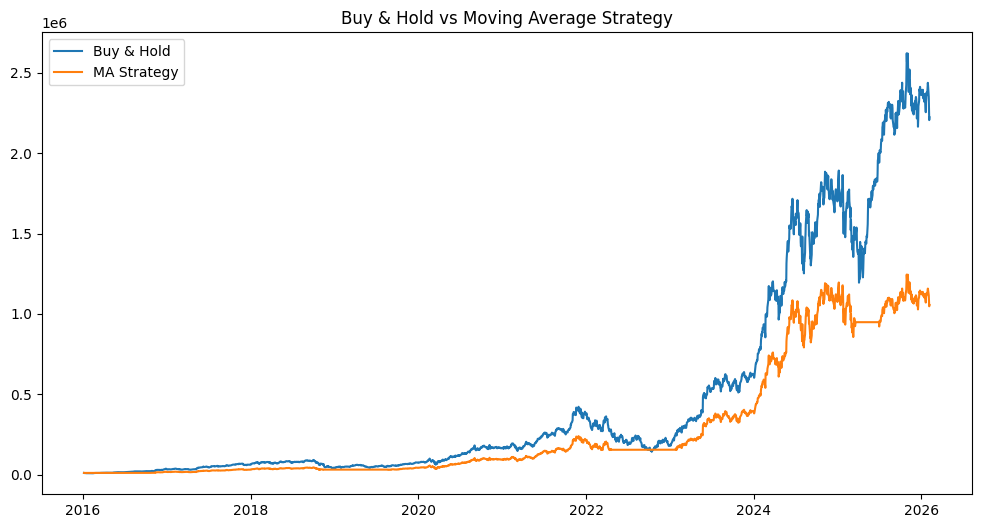

In [13]:
# Moving Average Crossover Strategy

df["MA50"] = df["Close"].rolling(50).mean()
df["MA200"] = df["Close"].rolling(200).mean()

# Generate signals
df["signal"] = 0
df.loc[df["MA50"] > df["MA200"], "signal"] = 1
df.loc[df["MA50"] < df["MA200"], "signal"] = 0

# Position changes
df["position"] = df["signal"].diff()

# Strategy returns
df["strategy_ret"] = df["signal"].shift(1) * df["ret"]

# Portfolio value
initial_capital = 10000
df["ma_portfolio"] = initial_capital * (1 + df["strategy_ret"]).cumprod()

# Plot comparison
plt.figure(figsize=(12,6))
plt.plot(df["bh_portfolio"], label="Buy & Hold")
plt.plot(df["ma_portfolio"], label="MA Strategy")
plt.legend()
plt.title("Buy & Hold vs Moving Average Strategy")
plt.show()


In [14]:
def performance_metrics(returns, rf=0.01):
    cagr = (1 + returns).prod()**(252/len(returns)) - 1
    vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - rf) / vol
    drawdown = (1 + returns).cumprod() / (1 + returns).cumprod().cummax() - 1
    max_dd = drawdown.min()
    
    return {
        "CAGR": round(cagr,3),
        "Volatility": round(vol,3),
        "Sharpe": round(sharpe,3),
        "MaxDrawdown": round(max_dd,3)
    }

bh_metrics = performance_metrics(df["ret"])
ma_metrics = performance_metrics(df["strategy_ret"])

bh_metrics, ma_metrics


({'CAGR': np.float64(0.71),
  'Volatility': np.float64(0.497),
  'Sharpe': np.float64(1.408),
  'MaxDrawdown': np.float64(-0.663)},
 {'CAGR': np.float64(0.588),
  'Volatility': np.float64(0.423),
  'Sharpe': np.float64(1.367),
  'MaxDrawdown': np.float64(-0.376)})